# Telco Customer Churn: Analysis and Prediction

# 1. Project Overview

**Objective:**  
Analyze Telco customer data to understand the factors driving customer churn and build a predictive model to identify at-risk customers. Provide actionable insights for retention strategies based on data patterns and model outcomes.

**Domain:**  
Telecommunications

**Tools Used:**  
pandas, numpy, matplotlib, seaborn, plotly, scikit-learn, statsmodels 
  

**Dataset Source:**    
[Kaggle – Telco Customer Churn Data](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)

**Dataset Size:**  
Records - 7,043 | Features - 21

**Modeling Objective:**  
- **Target Variable:** `Churn` (Yes/No)  
- **Problem Type:** Binary Classification  
- **Goal:** Predict customer churn to support proactive retention strategies


# 2. Data Understanding

## 2.1 Dataset Overview

The Telco Customer Churn dataset contains customer-level information from a telecommunications company. Each record represents one customer, including demographic attributes, account information, subscription details, billing data, and churn status.

| Variable             | Description                                               |
| -------------------- | --------------------------------------------------------- |
| **customerID**       | Unique customer identifier                                |
| **gender**           | Whether the customer is a male or a female                |
| **SeniorCitizen**    | Indicates senior citizen status (1 = Yes, 0 = No)         |
| **Partner**          | Whether the customer has a partner or not                 |
| **Dependents**       | Whether the customer has dependents or not                |
| **tenure**           | Number of months the customer has stayed with the company |
| **PhoneService**     | Whether the customer has a phone service                  |
| **MultipleLines**    | Whether the customer has multiple lines                   |
| **InternetService**  | Customer’s internet service provider                      |
| **OnlineSecurity**   | Whether the customer has online security                  |
| **OnlineBackup**     | Whether the customer has online backup                    |
| **DeviceProtection** | Whether the customer has device protection                |
| **TechSupport**      | Whether the customer has tech support                     |
| **StreamingTV**      | Whether the customer has streaming TV                     |
| **StreamingMovies**  | Whether the customer has streaming movies                 |
| **Contract**         | Contract term of the customer                             |
| **PaperlessBilling** | Whether the customer has paperless billing                |
| **PaymentMethod**    | Customer’s payment method                                 |
| **MonthlyCharges**   | Amount charged to the customer monthly                    |
| **TotalCharges**     | Total amount charged to the customer                      |
| **Churn**            | Whether the customer churned or not                       |


In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')
# Menambahkan folder utama (parent directory) ke dalam path Python
sys.path.append(os.path.abspath('..'))

# Menambahkan path src agar bisa diimpor
import src.config as config
import pandas as pd
from src.data_loader import load_data
from src.visualization import plot_churn_distribution, plot_numerical_features, plot_categorical_features, plot_correlation_heatmap, plot_outliers, plot_confusion_matrix, plot_shap_summary
from src.preprocess import clean_data, label_encode, feature_engineering_TenureGroup, feature_engineering_AvgPerMonth
from src.model_trainer import train_test_split_data, log_reg_model, random_forest_model, xgboost_model, evaluate_model, train_xgb_tuned, train_rf_tuned



In [2]:
# Load dan Clean Data
df = load_data('../data/Telco-Customer-Churn.csv')
df.head()

Data loaded successfully from ../data/Telco-Customer-Churn.csv.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2.2 Initial Observations


In [4]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

the data set has not missing value

In [5]:
df.duplicated().sum()

np.int64(0)

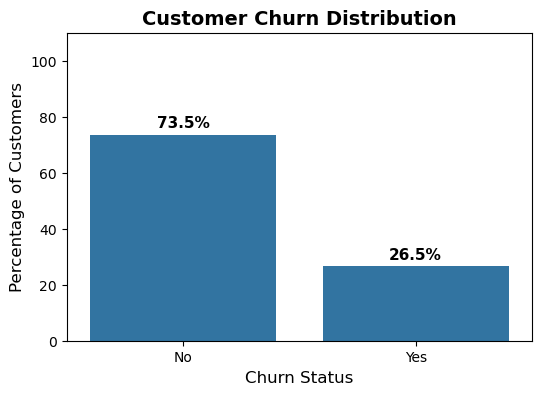

In [6]:
plot_churn_distribution(df)

the churn disribution shows that approximitely 26% the customer have churned, while 73.5% stay active, indicating the target data is imbalance

# 3. Data Preparation

## 3.1 Data Cleaning
Before proceeding to analysis, data integrity must be ensured. In this step, several cleaning operations are performed to prepare the dataset for machine learning models.

**Key Operations performed:**

- Feature Removal: The `customerID` column is dropped as it represents a unique identifier with no predictive value for churn.

- Data Type Correction: The `TotalCharges` column is converted from an object (string) to numeric (float). This conversion is necessary because empty spaces in the raw data caused the column to be misclassified.

- Handling Missing Values: Missing entries in `TotalCharges` (resulting from new customers with zero tenure) are filled using the median value. The median is selected for its robustness against outliers compared to the mean.

- String Standardization: Leading and trailing whitespaces are stripped from all categorical columns to ensure label consistency.

In [7]:
#this data for EDA only, not for modeling
# data cleaning from preprocess.py
df_cleaned = clean_data(df) 

[CLEANING] Done. Data now has 20 columns.


## 3.2 Data Transformation

**conversion:**
- `TotalCharges` successfully converted from objet to numeric
- convert categorical columns into label encoding
- convert multi categorical columns into one hot encoding


In [8]:
# encoding categorical features for predictive modeling 
df_encoded = label_encode(df_cleaned, config.CATEGORICAL_COLS)[0] #Takes only the first element from the function result

[ENCODING] done: 7 binary columns label-encoded, 10 multi-category columns one-hot encoded.


In [9]:
df_print = df_encoded.copy()

for col in df_print:
   print(f"Column: {col}")
   print(df_print[col].unique())
   print("\n")

Column: gender
[0 1]


Column: SeniorCitizen
[0 1]


Column: Partner
[1 0]


Column: Dependents
[0 1]


Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


Column: PhoneService
[0 1]


Column: PaperlessBilling
[1 0]


Column: MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


Column: TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


Column: Churn
[0 1]


Column: MultipleLines_No phone service
[1. 0.]


Column: MultipleLines_Yes
[0. 1.]


Column: InternetService_Fiber optic
[0. 1.]


Column: InternetService_No
[0. 1.]


Column: OnlineSecurity_No internet service
[0. 1.]


Column: OnlineSecurity_Yes
[0. 1.]


Column: OnlineBackup_No internet service
[0. 1.]


Column: OnlineBackup_Yes
[1. 0.]


Column: DeviceProtection_No internet service
[0. 1.]


Column: DeviceProtection_Yes

## 3.4 feature engineering

In [10]:
# feature engineering for EDA
# Average Monthly Revenue per Customer
df_cleaned = feature_engineering_TenureGroup(df_cleaned)
# Grouping Customers by Service Duration
df_cleaned = feature_engineering_AvgPerMonth(df_cleaned)

[FEATURE ENGINEERING] done: Created 'TenureGroup' feature.
[FEATURE ENGINEERING] done: Created 'AvgChargesPerMonth' feature.


- `TenureGroup` shows customer loyalty stage 
- `AvgChargespermonth` shows spending pattern

# 4 Exploratory Data Analysis


In [11]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 4.1 Customer Demographics

The goal: Understand who will churn.


*   Are new customers more likely to churn?
    Hypothesis: First-year customers ('0-1 year') are typically the least loyal.
*   Are senior customers more loyal?
*   Are customers with a spouse/dependents less likely to churn?


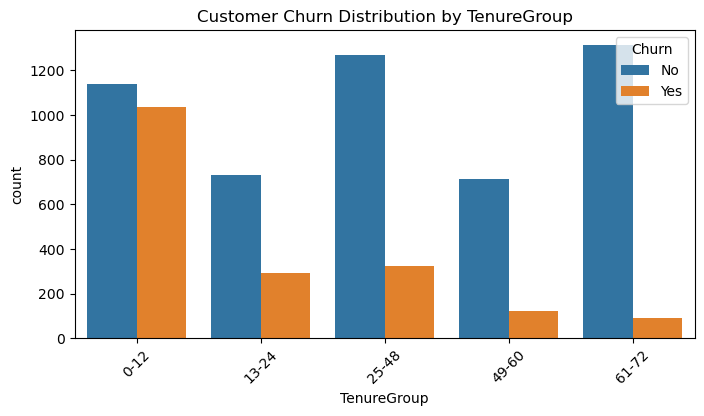

In [12]:
# Analyze churn behavior across different tenure segments
plot_categorical_features(df_cleaned, ['TenureGroup'])

- High-Risk Segment: The 0-12 month tenure segment represents the highest risk of churn, as the number of churned customers in this group is nearly proportional to those who were retained.

- Retention Pattern: A clear inverse relationship is observed between tenure length and churn propensity; as the customer relationship matures, the likelihood of churn decreases significantly, particularly after the 24-month mark.

- Loyalty Milestone: Customers who reach the 61-72 month bracket exhibit the highest level of loyalty, with a negligible churn count compared to the earlier stages of the customer lifecycle.

- Strategic Takeaway: Targeted retention strategies and early-engagement programs should be prioritized for customers within their first year of service to mitigate the high volume of early-stage churn

## 4.2 Service Usage Patterns

The objective of this section is to identify how specific service subscriptions influence customer retention. Analyzing these patterns helps in understanding which product offerings are associated with higher attrition rates.

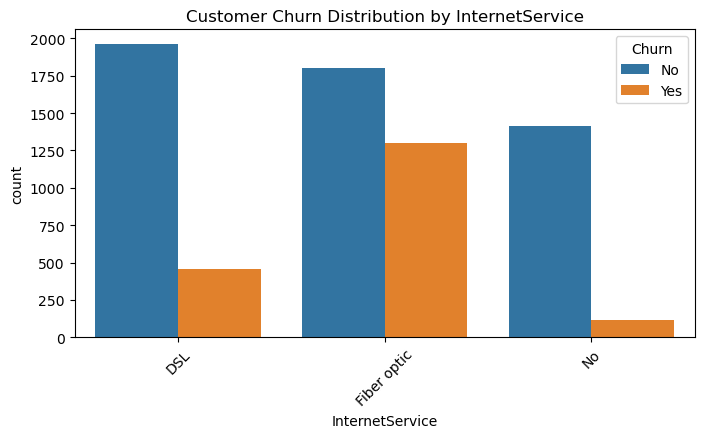

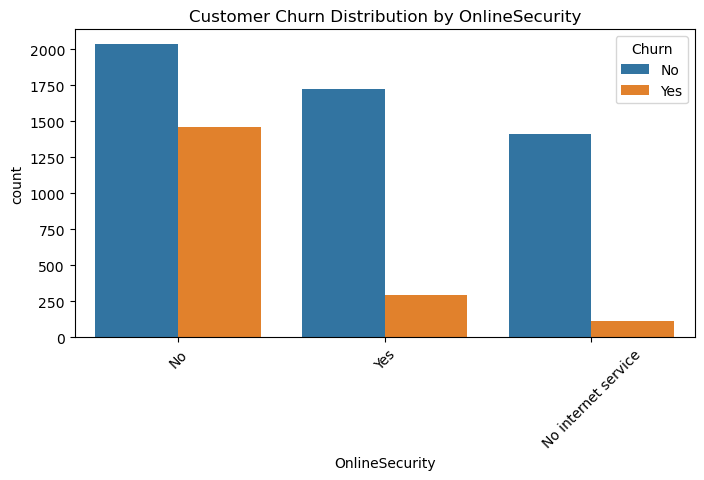

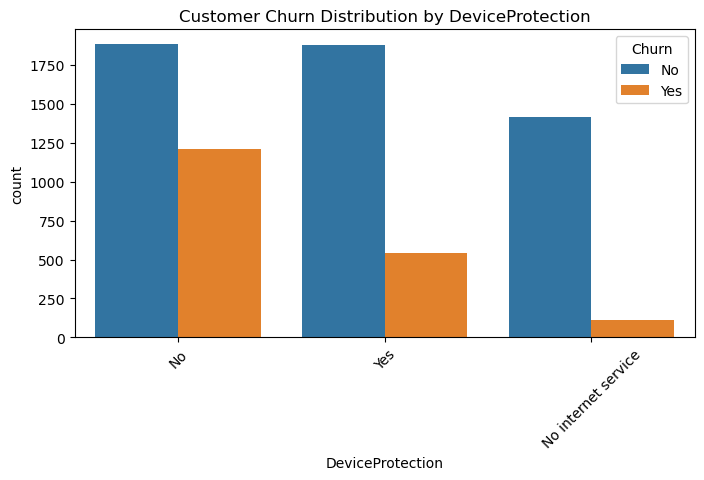

In [13]:
service_cols = ['InternetService', 'OnlineSecurity', 'DeviceProtection']
plot_categorical_features(df_cleaned, service_cols)

The analysis of service patterns reveals three critical findings regarding customer retention:

- Fiber Optic Risk: Customers using Fiber optic internet service exhibit the highest churn propensity compared to other connection types.

- Security Correlation: A lack of Online Security and Device Protection services is strongly associated with increased customer attrition.

- Retention Factors: Active security add-ons serve as significant loyalty drivers, as customers with these features are substantially more likely to remain with the provider.

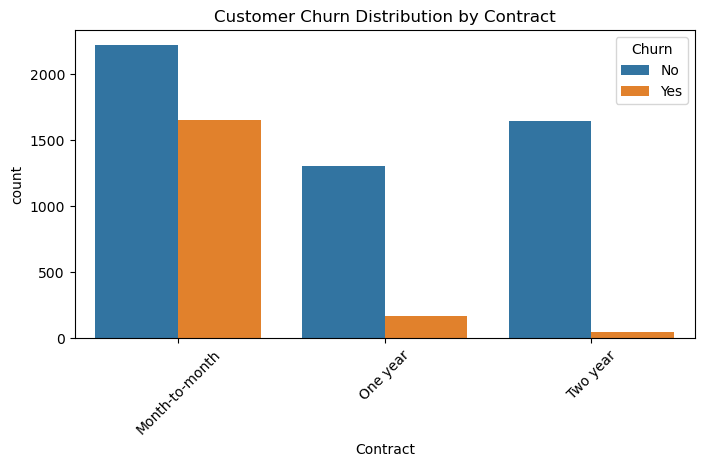

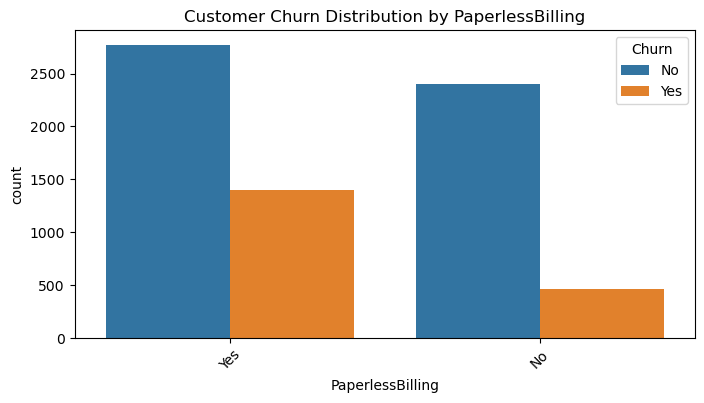

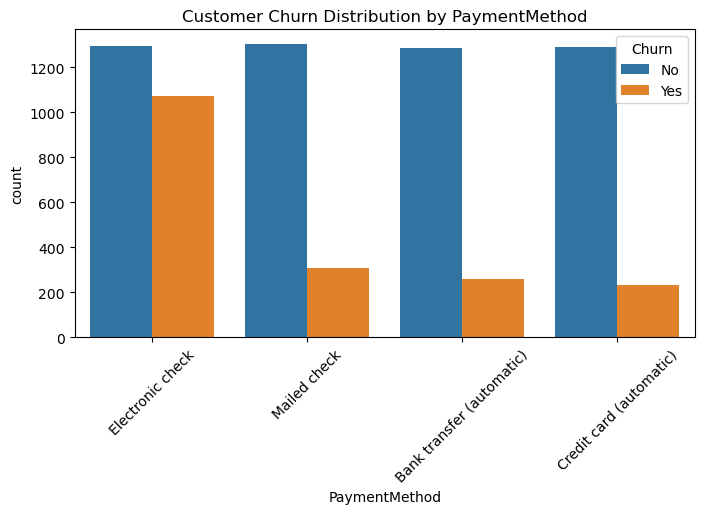

In [14]:
# Analyzing the impact of contract terms and payment methods
contract_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']
plot_categorical_features(df_cleaned, contract_features)

The relationship between payment structures and customer retention reveals several critical risk factors:
- Contract Risk: Month-to-month contracts are the primary driver of churn, while long-term commitments (1-2 years) show superior retention.

- Payment Volatility: Customers using Electronic check represent the highest attrition risk compared to automated payment methods.

- Billing Impact: Users opted into Paperless Billing exhibit a notably higher churn volume.

- Strategic Goal: Conversion to long-term contracts and automated billing is essential for stabilizing the customer base.

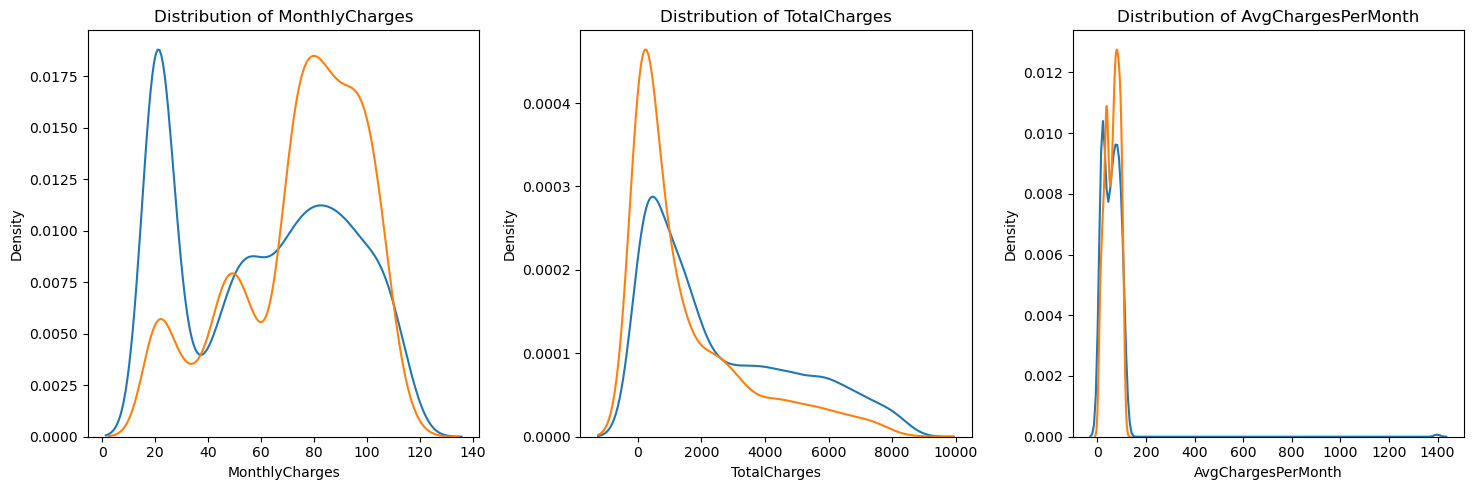

In [15]:
# Analyzing the financial impact on churn
financial_features = ['MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth']
plot_numerical_features(df_cleaned, financial_features)


**Financial Impact Analysis**

This section evaluates the correlation between billing amounts and customer retention.

- Monthly Charges: Churn propensity is highest among customers paying between $70 - $110, whereas loyal customers are concentrated in the $20 price point.

- Total Charges: Most churners are skewed toward low total spending, confirming that attrition typically occurs early in the customer lifecycle.

- Average Spending: High average monthly costs correlate with increased volatility, identifying high-ARPU subscribers as a high-risk segment.

- Strategic Takeaway: High pricing is a primary driver of churn; implementing retention offers for high-tier plans is recommended to stabilize revenue.

# 4.5 Feature Correlation Analysis

This final section of the Exploratory Data Analysis summarizes the relationships between all features and the target variable, Churn. The correlation heatmap provides a high-level overview of which factors possess the strongest predictive power.

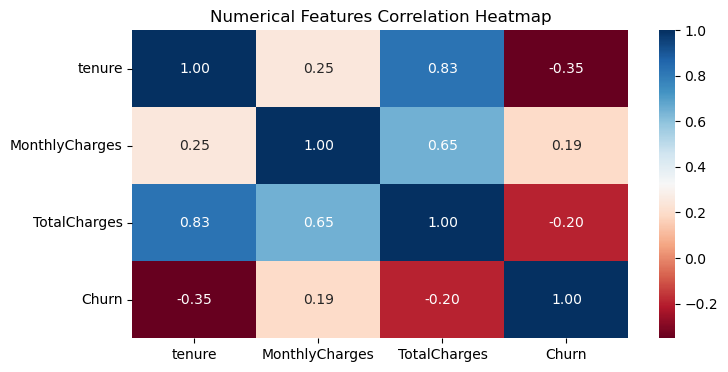

In [16]:
# Finalizing EDA with a global correlation matrix
plot_correlation_heatmap(df_encoded, config.NUMERICAL_COLS + ['Churn'])

**Key Findings:**

- Loyalty Driver: tenure shows the strongest negative correlation with churn (-0.35), indicating that long-term customers are significantly less likely to leave.

- Cost Impact: MonthlyCharges exhibits a positive correlation with churn (0.19), reinforcing that higher service costs are associated with increased attrition risk.

- Feature Redundancy: A strong correlation (0.83) is observed between tenure and TotalCharges. This multicollinearity is expected, as total charges accumulate over time, and will be considered during the modeling phase to avoid feature redundancy.

# 5. Machine Learning Modeling

## 5.1 Feature Selection
**Target Variable:**

* `Churn` (encoded as 1 = Yes, 0 = No)

**Candidate Features:**

* Statistically validated and actionable:

  * Numeric: `tenure`, `MonthlyCharges`, `TotalCharges`
  * Categorical: `Contract`, `PaymentMethod`, `InternetService`, `OnlineSecurity`, `TechSupport`, `PaperlessBilling`, `DeviceProtection`, `Dependents`, `SeniorCitizen`
* Exclude: `gender`, `PhoneService`, `customerID` (non-informative)


## 5.2 Candidate Models

To ensure a systematic and unbiased model development process, five candidate algorithms were selected, covering diverse methodological families linear, distance-based, and ensemble tree-based methods. This diversity helps assess which learning paradigm best captures customer churn behavior while maintaining a balance between interpretability and predictive strength.

**Candidate Models Overview**

* **Logistic Regression**: Linear, interpretable baseline suitable for initial benchmarking.
* **Random Forest**: Ensemble tree model known for robustness and handling multicollinearity.
* **XGBoost**: Gradient boosting method capable of modeling complex feature interactions.

**Evaluation Approach**

The model evaluation will follow a two-stage process designed to reflect real-world machine learning practice:

1. **Baseline Stage:**
   Logistic Regression and KNN will be trained using default hyperparameters.
   This establishes a reference for model interpretability and fundamental predictive capacity without introducing complexity from parameter tuning.

2. **Advanced Model Stage:**
   For ensemble-based models (Random Forest and XGBoost), hyperparameter tuning will be performed on key parameters.
   The objective here is to reach fair operational settings that reflect each model’s potential.

3. **Model Selection:**
   After comparing all models using consistent evaluation metrics (Accuracy, Precision, Recall, F1-score, ROC-AUC and PR-AUC), the top-performing algorithm will be chosen.


In [17]:
X_cat = df_encoded.drop(columns=[config.TARGET,'gender', 'PhoneService'])
X_reg = df_encoded.drop(columns=['TotalCharges'])
y = df_encoded[config.TARGET]

In [18]:
# split data into training and testing sets
# Perform the Split (80% Train, 20% Test)
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split_data(X_reg, y)

X_train, X_test, y_train, y_test = train_test_split_data(X_cat, y)

Training Logistic Regression...
Evaluating Logistic Regression...

EVALUATING: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

AUC-ROC Score: 0.843
Average Precision: 0.636


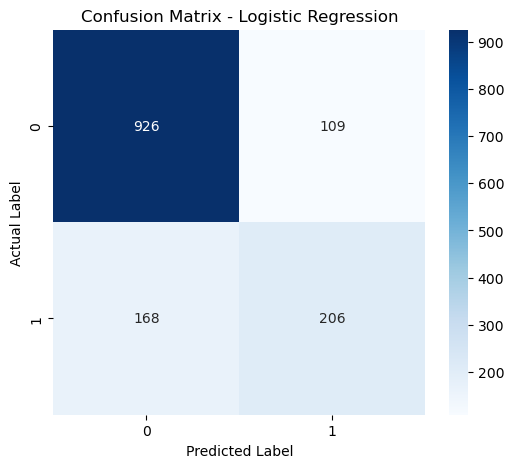


Training Random Forest...
Evaluating Random Forest...

EVALUATING: Model
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

AUC-ROC Score: 0.828
Average Precision: 0.623


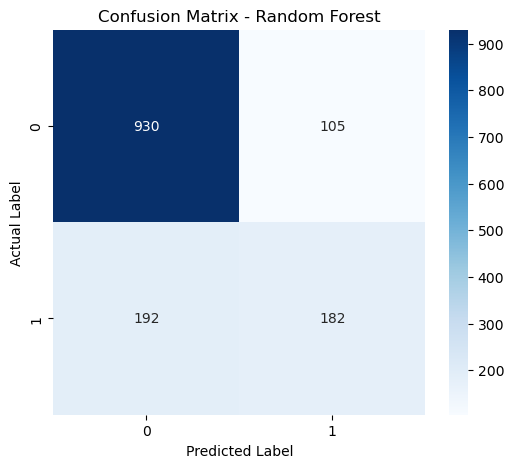


Training XGBoost...
Evaluating XGBoost...

EVALUATING: Model
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

AUC-ROC Score: 0.837
Average Precision: 0.642


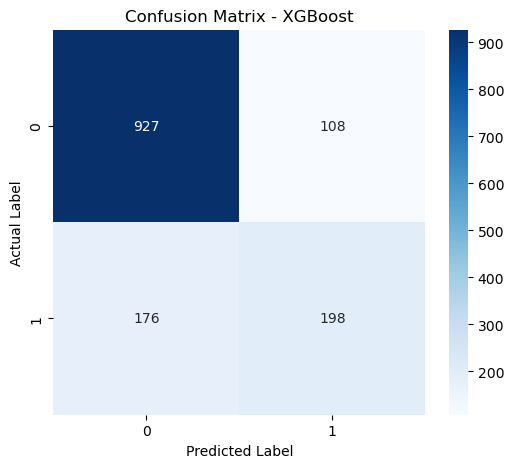

In [ ]:
# --- LOGISTIC REGRESSION (BASELINE) ---
print(f"Training Logistic Regression...")
model_lr = log_reg_model(X_train, y_train)
print(f"Evaluating Logistic Regression...")

evaluate_model(model_lr, X_test, y_test, model_name="Logistic Regression")

y_pred_lr = model_lr.predict(X_test)

plot_confusion_matrix(y_test, y_pred_lr, model_name="Logistic Regression")

# --- ENSEMBLE MODELS ---
models_tree = {
    'Random Forest': random_forest_model,
    'XGBoost': xgboost_model
}

for name, model_func in models_tree.items():
    print(f"\nTraining {name}...")
    model = model_func(X_train, y_train)
    print(f"Evaluating {name}...")
    evaluate_model(model, X_test, y_test)
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name=name)

## 5.3 Model Performance Comparison

This section evaluates the effectiveness of the baseline model against the ensemble candidates. The performance is assessed using the test set to determine how well each model generalizes to unseen data.

1. Comparative Performance Summary

| Metric           | Logistic Regression (Baseline)| Random Forest | XGBoost |
| ------------------- | ---------------------------|---------------|---------|
| Accuracy      | 0.80 | 0.79 | 0.80
| F1-Score (Churn)        |0.60 | 0.55 | 0.58
| Recall (Churn)      | 0.55 | 0.49 | 0.53
| AUC-ROC Score  | 0.843 | 0.828 | 0.837
| Average Precision         | 0.636 | 0.623 | 0.837

2. Confusion Matrix Interpretation
   - Logistic Regression: Successfully identified 206 churners but failed to detect 168 (False Negatives), representing the best current balance for identifying attrition.

   - Random Forest: Recorded the highest volume of missed churners, with 192 False Negatives, indicating a bias toward the majority class.

   - XGBoost: Performed similarly to the baseline, yielding 198 True Positives and 176 False Negatives.

3. Evaluation Findings

   - Baseline Strength: Logistic Regression currently yields the highest Recall (0.55) and F1-Score (0.60), suggesting that the linear relationships identified during EDA (e.g., tenure influence) are highly predictive.

   - Sensitivity Gap: Across all models, the recall for the Churn class is relatively low (0.49 - 0.55), meaning approximately half of the actual churners are not being captured.

   - Precision Potential: XGBoost achieved the highest Average Precision (0.642), indicating its potential to accurately rank churn risk once optimized.

# 6 Model Interpretation (SHAP Analysis)

While evaluation metrics provide a measure of model accuracy, they do not explain the logic behind individual predictions. This section utilizes **SHAP (SHapley Additive exPlanations)** to interpret the XGBoost model's decisions, providing transparency for business stakeholders.

#### **6.1 What is SHAP?**
SHAP is a game-theoretic approach that explains the output of any machine learning model by assigning an importance value to each feature for a specific prediction. It calculates how much each feature contributes to the difference between the actual prediction and the average prediction:
$$f(x) = \phi_0 + \sum_{i=1}^{M} \phi_i$$
Where $\phi_i$ is the SHAP value for feature $i$.

#### **6.2 Global Interpretability (Summary Plot)**
The Summary Plot ranks features by their overall impact on the model. It shows not only which features are most important but also how their values (high or low) influence the probability of churn.

* **Key Objectives:**
    * Identify the top drivers of customer attrition.
    * Validate if the model's logic aligns with the business insights found during EDA (e.g., the impact of contract types and tenure).

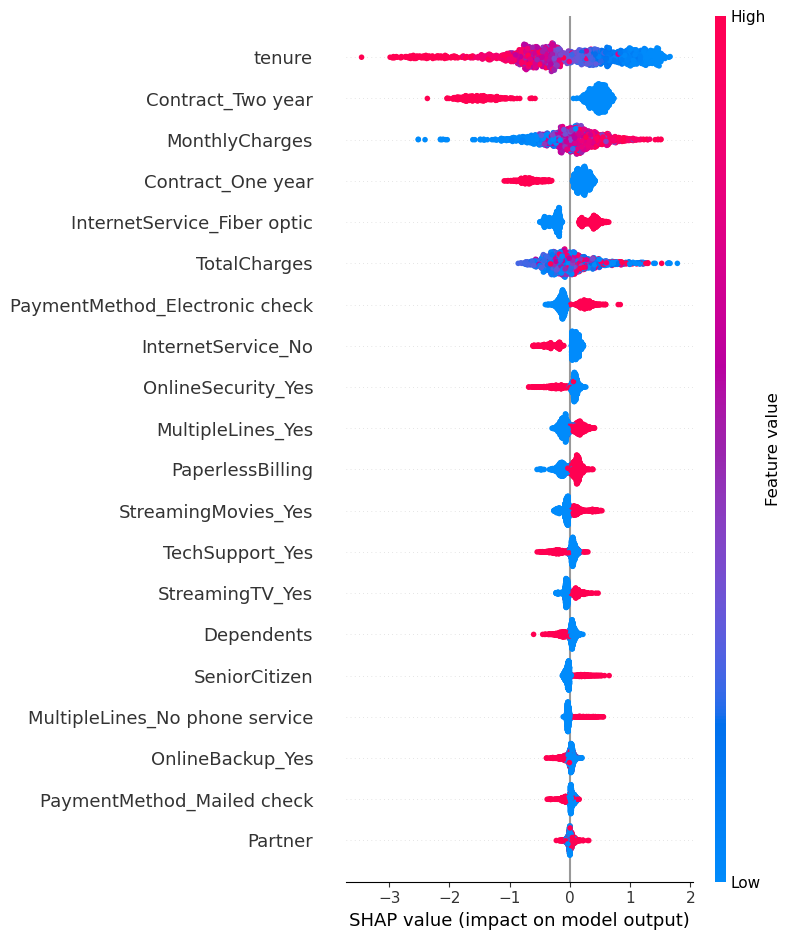

In [ ]:

plot_shap_summary(model, X_test, "XGBoost")

Key Insights from SHAP Analysis:

- Tenure as the Primary Anchor: tenure is the most influential feature. High tenure values (red dots) are concentrated on the negative side (left), indicating that the longer a customer stays, the significantly lower their probability of churning.

- Contractual Stability: Long-term commitments (Contract_Two year and Contract_One year) strongly drive negative SHAP values. This confirms that customers on annual or biennial contracts are the most stable segment of the subscriber base.

- The Fiber Optic Risk: High values for InternetService_Fiber optic (red dots) are positioned on the positive side (right), showing that fiber optic users are more prone to churn. This may suggest issues with service pricing or perceived value compared to competitors.

- Financial Pressure: Higher MonthlyCharges tend to push the model towards a churn prediction. Conversely, higher TotalCharges correlate with lower churn risk, likely acting as a proxy for long-term customer loyalty.

- Payment Behavior: Using an Electronic check as a payment method is identified as a significant positive driver for churn, highlighting a specific behavioral segment that requires targeted retention efforts.

# 8 Model Optimization (Hyperparameter Tuning)

This chapter focuses on refining the candidate models to achieve peak predictive performance. While the baseline models provided a solid starting point, hyperparameter tuning is essential to minimize the high volume of False Negatives identified in the initial evaluation phase.

## 8.1 Optimization Strategy: GridSearchCV

employ GridSearchCV to systematically explore a predefined space of hyperparameters. This process ensures that we find the most effective configuration for our specific dataset through 5-fold cross-validation.
Key Tuning Objectives:

- Improving Sensitivity: The primary goal is to increase the Recall for the Churn class, which was previously limited to approximately 0.49 - 0.55.

- Balancing Performance: use the F1-Score as the primary optimization metric. This ensures that our gains in recall do not lead to an unacceptable drop in precision.

- Handling Class Imbalance: We utilize cost-sensitive parameters to penalize the model more heavily for misclassifying churners.

## 8.2 Parameter Configuration

The tuning process involves adjusting the internal structures of our ensemble models. Below are the key parameters targeted for optimization:

| Model         | Key Parameters | Strategy for Churn 
| ------------------- | ---------------------------|---------------|
| XGBoost      | `learning_rate`, `max_depth`, `n_estimators`, `scale_pos_weight` | Using scale_pos_weight to add more importance to the minority class.
| Random Forest        | `n_estimators`, `max_depth`, `min_samples_leaf`, `class_weight` | Utilizing class_weight='balanced' to automatically adjust weights inversely proportional to class frequencies. |


## 8.3 Implementation via Modular Pipeline

To maintain code quality and scalability, the tuning logic is implemented within a dedicated script (src/models.py). This modular approach separates the intensive computation of the search process from the analytical layer of the notebook.

--- Starting XGBoost Hyperparameter Tuning ---
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Tuning Complete. Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 3, 'subsample': 0.8}

EVALUATING: Optimized XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.50      0.82      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.73      0.75      1409

AUC-ROC Score: 0.844
Average Precision: 0.666


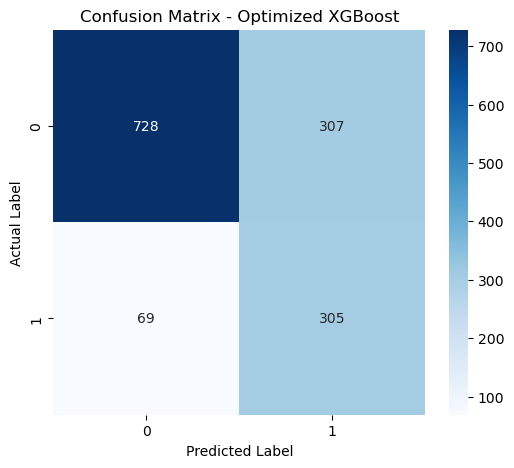

In [ ]:


best_xgb_model, best_params = train_xgb_tuned(X_train, y_train)

evaluate_model(best_xgb_model, X_test, y_test, model_name="Optimized XGBoost")

y_pred_tuned = best_xgb_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_tuned, model_name="Optimized XGBoost")

--- Starting Random Forest Hyperparameter Tuning ---
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Tuning Complete. Best Params: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

EVALUATING: Optimized Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.54      0.76      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

AUC-ROC Score: 0.844
Average Precision: 0.661


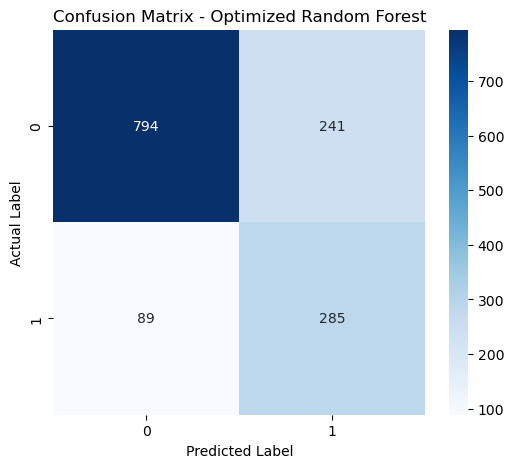

In [ ]:

best_rf_model, rf_params = train_rf_tuned(X_train, y_train)

evaluate_model(best_rf_model, X_test, y_test, model_name="Optimized Random Forest")

y_pred_rf = best_rf_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, model_name="Optimized Random Forest")

8.4 Hyperparameter Tuning Results

The hyperparameter tuning process has successfully shifted the models' priorities toward identifying at-risk customers. By utilizing scale_pos_weight for XGBoost and class_weight for Random Forest, we have achieved a significant breakthrough in Recall performance, ensuring fewer churners are missed.

**1. Final Performance Comparison (Baseline vs. Optimized)**
| Metric         | Optimized XGBoost | Optimized Random Forest | Logistic Regression (Baseline) 
| ------------------- | ---------------------------|---------------|----------------|
| Recall (Churn)      | 0.82| 0.76 | 0.55 |
| F1-Score (Churn)     | 0.62 | 0.63 | 0.60 |
| Precision (Churn) | 0.50 | 0.54 | 0.65 | 
| Accuracy | 0.73 | 0.77 | 0.80 |
| AUC-ROC Score | 0.844 | 0.844 | 0.843 |

**2. Confusion Matrix Analysis** 
The confusion matrices visualize the impact of our cost-sensitive learning strategy:
- Optimized XGBoost: Successfully captured 305 churners (True Positives) while only missing 69 (False Negatives). This model provides the highest sensitivity for identifying potential attrition, capturing nearly 27% more churners than the baseline.
- Optimized Random Forest: Correctly identified 285 churners with 89 False Negatives. While it captures fewer churners than XGBoost, it maintains a better balance with fewer False Positives (241 vs. 307).

**3. Strategic Trade-off Interpretation**
- Prioritizing Sensitivity: To achieve a Recall of 0.82, the models experienced a decrease in Precision. This results in more "False Alarms," where loyal customers are flagged for retention.
- Business Justification: In the context of customer retention, the cost of losing a customer (Churn) is significantly higher than the cost of a retention campaign (False Positive). Therefore, the Optimized XGBoost is the superior choice for a proactive business strategy.
- Model Quality (AUC-ROC): Despite the drop in accuracy, all models maintain a high AUC-ROC (0.844), proving that the models remain highly capable of distinguishing between classes, even with the shift in prediction thresholds.


# 9 Conclusion and Business Recommendations

This final chapter synthesizes the modeling results into actionable business strategies. By shifting the focus from simple accuracy to high-sensitivity churn detection, the solution provides a powerful tool for retention departments.

## 9.1 Final Model Selection: Optimized XGBoost

Based on the comparative analysis, Optimized XGBoost is selected as the primary deployment model.

- Maximum Sensitivity: The model achieves a Recall of 0.82, successfully identifying 305 out of 374 actual churners in the test set.

- Cost Efficiency: In the telecommunications industry, the cost of acquiring a new customer is significantly higher than the cost of retaining an existing one. The ability to capture nearly 82% of potential attrition ensures that interventions are precisely targeted.

- Reliable Prediction: With an AUC-ROC of 0.844, the model maintains a high ability to distinguish between churners and loyal customers, despite the strategic drop in precision used to prioritize retention.

## 9.2 Actionable Business Insights

Interpretations from the SHAP Analysis provide concrete guidance for marketing and operational steps:

- Contractual Incentives: Customers on Month-to-month contracts represent the highest churn risk. Targeted discounts or loyalty bonuses are recommended to encourage transitions to One-Year or Two-Year contracts.

- Fiber Optic Service Audit: Fiber optic users are detected as a high-risk segment. A quality-of-service audit or price-value review at this technical level is required to address potential dissatisfaction.

- The "First 12 Months" Focus: Tenure is the strongest predictor; new customers exhibit a higher tendency to leave. Personalized onboarding and proactive support during the initial period are crucial for increasing Customer Lifetime Value.

- Payment Method Migration: Customers using Electronic checks show higher churn tendencies. Promoting Auto-pay or credit card payments through small incentives could increase customer stickiness to the service.

